In [276]:

pred = model.predict(X_val,batch_size =512)

In [56]:
y_val[y_val[:0]==3]

array([], dtype=float64)

In [275]:
# -*- coding: utf-8 -*-
#import matplotlib.pyplot as plt
import numpy as np
import gzip
import keras

from keras.layers import Input



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
#%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,AveragePooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau



#https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
model = Sequential()
Input 
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



batch_size = 64



model.load_weights('mnist.h5') #trained with astar super computer for 30mins

X_train = mnist.train.images
X_train = np.reshape(X_train,(X_train.shape[0],28,28,1))
X_val = mnist.test.images
X_val = np.reshape(X_val,(X_val.shape[0],28,28,1))[::1]
y_train = mnist.train.labels
y_val = mnist.test.labels[::1]




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [62]:
dictt = np.load('dictt_BetterSampling_mnist.npy').item()
for i in dictt.keys():
    dictt[i] += [pred[i],]

In [64]:
b = np.stack([np.stack(dictt[x][-1],0) for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == digit and 
                    np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)

In [71]:
np.log10(np.mean(b,0))

array([-3.1022449 , -4.4507537 , -3.8417337 , -3.394354  , -2.3838122 ,
       -2.9739118 , -4.3101954 , -2.7304597 , -2.6665182 , -0.00464179],
      dtype=float32)

0 [-0.0, -4.7, -3.0, -3.9, -4.1, -3.2, -2.5, -4.8, -3.0, -3.7]
1 [-4.4, -0.0, -3.4, -2.9, -3.3, -3.7, -3.8, -2.7, -4.0, -3.8]
2 [-3.1, -3.0, -0.0, -3.0, -3.1, -4.6, -2.8, -2.5, -3.2, -4.6]
3 [-6.0, -3.5, -2.9, -0.0, -4.7, -3.3, -6.2, -3.5, -4.1, -4.0]
4 [-3.8, -4.8, -4.5, -4.9, -0.0, -4.5, -3.8, -3.1, -2.9, -2.4]
5 [-3.7, -4.7, -4.4, -2.6, -4.6, -0.0, -3.3, -5.0, -3.5, -3.2]
6 [-2.9, -3.1, -3.4, -3.4, -3.9, -2.4, -0.0, -5.5, -3.3, -5.0]
7 [-4.8, -2.8, -2.7, -3.5, -3.4, -3.3, -6.6, -0.0, -4.4, -2.5]
8 [-3.2, -8.1, -4.3, -3.1, -5.0, -3.7, -3.3, -6.5, -0.0, -3.6]
9 [-3.1, -4.5, -3.8, -3.4, -2.4, -3.0, -4.3, -2.7, -2.7, -0.0]


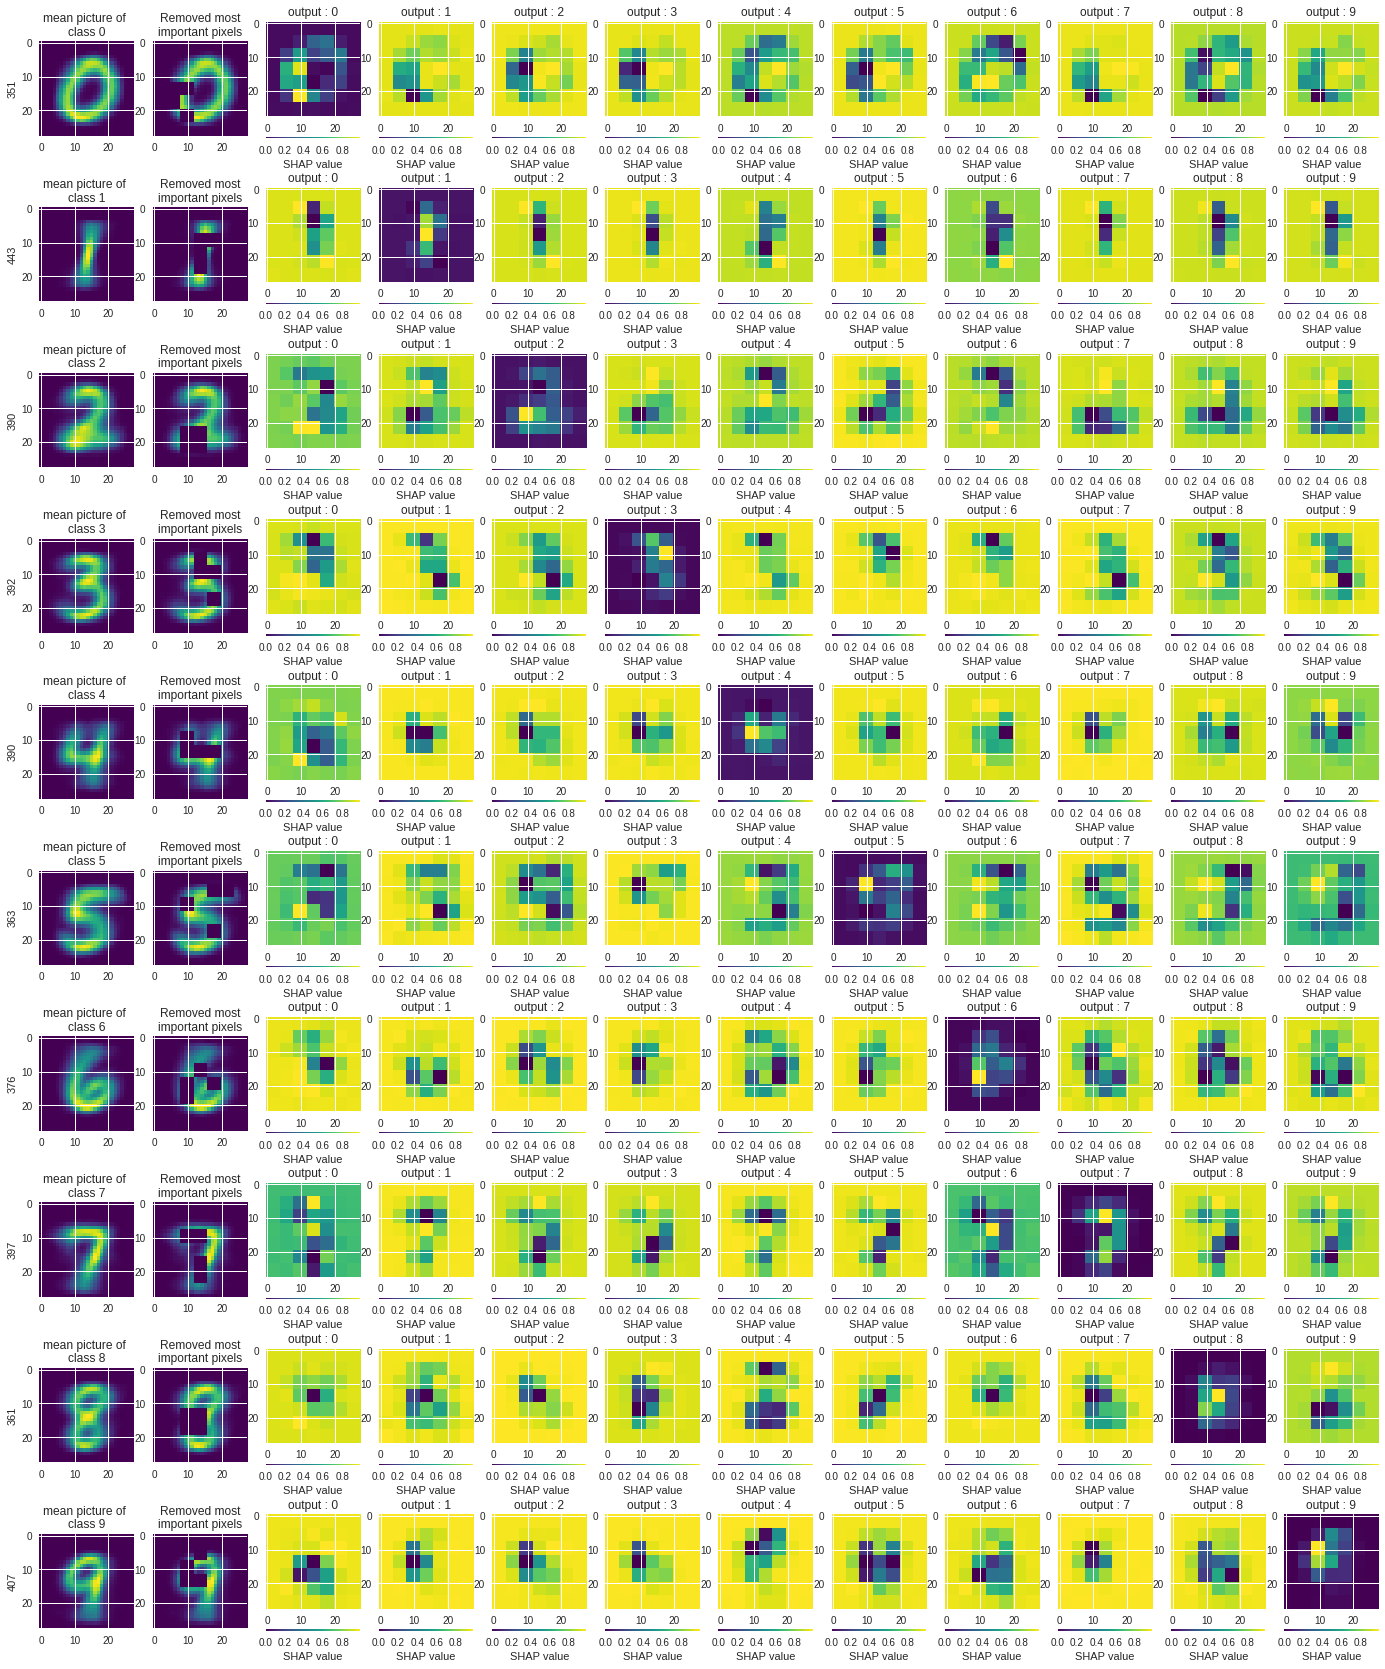

In [75]:
f,ax = plt.subplots(10,12,figsize=(12*2,5*6))

for digit in range(10):
    all_pic = np.stack([dictt[x][0][:,:,0] for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == digit and 
                    np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)
    avg_pic = np.mean(all_pic,0)
    ax[digit,0].imshow(avg_pic,plt.cm.viridis)
    ax[digit,0].set_title('mean picture of \nclass %s'%digit)
    ax[digit,0].set_ylabel(len(all_pic))
    a = np.stack([np.stack(dictt[x][1],0) for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == digit and 
                    np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)
    phi = np.mean(a,(0))
    phi = (phi - np.stack([np.mean(phi,-1),],-1))/np.stack([np.std(phi,-1),],-1)
    for preds in range(0,10):
        shapley_image = np.copy(dictt[0][2].astype(np.float32))
        for x in range(28):
            for y in range(28):
                shapley_image[x,y] = phi[preds][int(shapley_image[x,y])]
        ax[digit,preds+2].imshow(shapley_image,plt.cm.viridis)
        ax[digit,preds+2].set_title('output : %s' %preds)
        cb = plt.colorbar(cax,  ax=ax[digit,preds+2], label="SHAP value", orientation="horizontal", 
                          aspect=70,cmap=plt.cm.viridis) 
        if preds == digit:
            largest_shap_val = np.percentile(np.concatenate(shapley_image),90)
            avg_pic[shapley_image > largest_shap_val] = 0 
            ax[digit,1].imshow(avg_pic,cmap=plt.cm.viridis)
            ax[digit,1].set_title('Removed most\nimportant pixels')
plt.show()
    
    


In [52]:
a = np.stack([np.stack(dictt[x][1],0)
                  for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == 3 and 
                      np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)

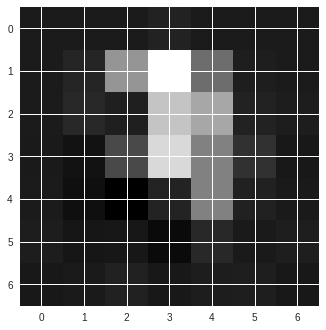

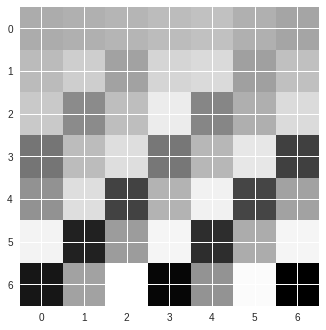

[[-0.24412194 -0.24417324 -0.24424069 -0.24434665 -0.2444434  -0.24418388
  -0.24402611]
 [-0.24433686 -0.24470302 -0.24398029 -0.24483868 -0.24495082 -0.24394512
  -0.24442233]
 [-0.24461436 -0.24363306 -0.24438253 -0.24538913 -0.24355072 -0.24415562
  -0.24499287]
 [-0.24328874 -0.24435219 -0.24505728 -0.24331956 -0.24428187 -0.24529038
  -0.24245447]
 [-0.24373889 -0.24505466 -0.2424878  -0.24423507 -0.24552368 -0.24252215
  -0.24398153]
 [-0.24562365 -0.24207614 -0.2438972  -0.24568115 -0.24223945 -0.24412253
  -0.24568492]
 [-0.24189313 -0.24399291 -0.2460482  -0.24167101 -0.24375229 -0.24590155
  -0.24155566]]


In [54]:
plt.imshow(np.reshape(np.mean(a[:,0,:],0),(7,7)));plt.show()
plt.imshow(np.reshape(np.median(a[:,0,:],0),(7,7)));plt.show()
print np.reshape(np.median(a[:,0,:],0),(7,7))

(28, 28)

0 [-0.0, -11.1, -7.8, -11.7, -9.0, -9.1, -7.0, -10.2, -7.4, -7.8]
1 [-10.3, -0.0, -8.5, -10.5, -5.9, -8.8, -8.1, -7.4, -8.6, -8.7]
2 [-8.7, -9.4, -0.0, -7.6, -8.3, -11.1, -9.2, -8.0, -7.3, -10.0]
3 [-15.9, -13.2, -8.4, 0.0, -13.7, -7.5, -14.4, -9.7, -8.8, -10.0]
4 [-22.7, -15.5, -16.7, -23.4, 0.0, -17.9, -15.7, -15.1, -13.5, -12.7]
5 [-13.3, -15.9, -13.3, -8.4, -12.4, 0.0, -9.1, -14.3, -8.3, -8.6]
6 [-10.2, -16.4, -12.7, -17.2, -12.1, -8.8, 0.0, -21.4, -9.3, -15.3]
7 [-14.8, -8.8, -7.7, -9.4, -8.1, -12.0, -17.8, -0.0, -10.8, -7.3]
8 [-14.6, -23.0, -11.8, -11.9, -14.1, -11.5, -11.5, -19.7, 0.0, -11.6]
9 [-11.3, -13.6, -10.7, -11.6, -5.2, -9.8, -13.3, -7.9, -7.6, -0.0]


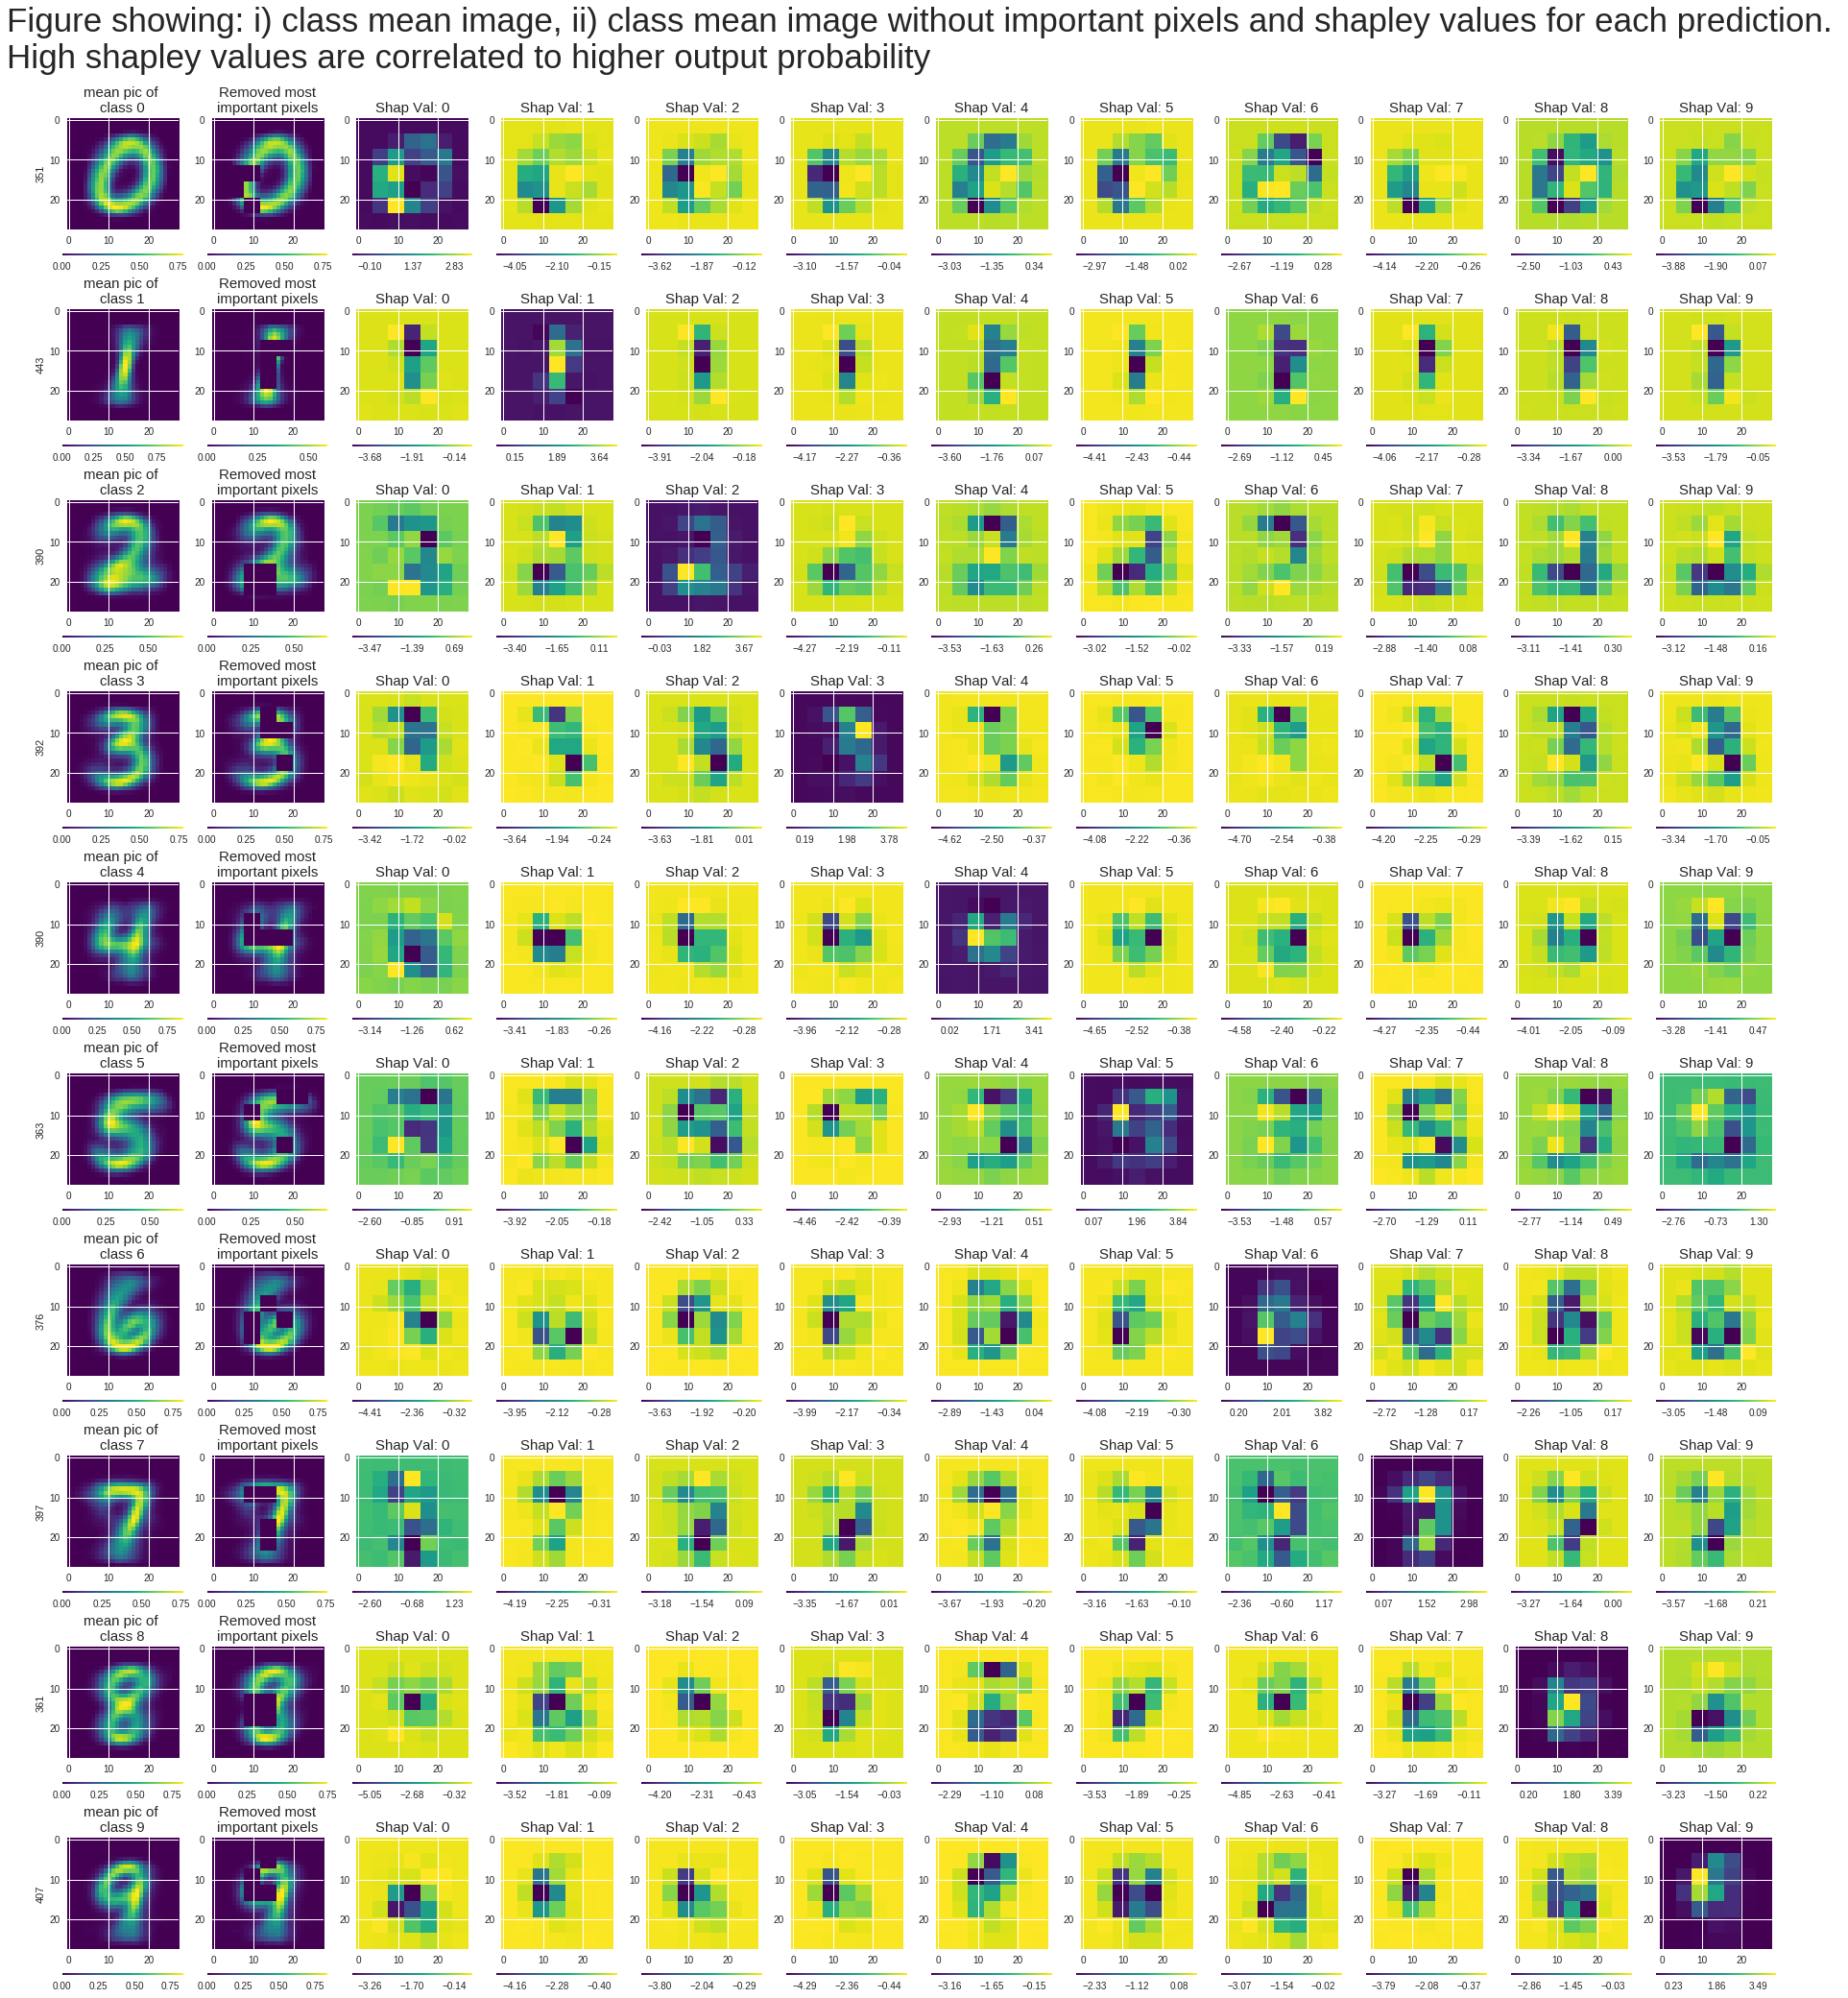

In [322]:
fontsize = 15
import copy
dictt_avg_plts = {}
f,ax = plt.subplots(10,12,figsize=(16*2,2*18))
plt.figtext(0.10, 0.90, 'Figure showing: i) class mean image, ii) class mean image without important pixels and shapley values for each prediction. \nHigh shapley values are correlated to higher output probability', 
            horizontalalignment='left',fontsize=35) 
for digit in range(10):
    all_pic = np.stack([dictt[x][0][:,:,0] for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == digit and 
                    np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)
    avg_pic = np.mean(all_pic,0)
    cax = ax[digit,0].imshow(avg_pic,cmap = plt.cm.viridis)
    dictt_avg_plts[(digit,0)] = copy.deepcopy(avg_pic)
    cb = plt.colorbar(cax,  ax=ax[digit,0],ticks=[0,.25,.5,.75], orientation="horizontal", aspect=70) 
    ax[digit,0].set_title('mean pic of \nclass %s'%digit,fontsize=fontsize)
    ax[digit,0].set_ylabel(len(all_pic))
    #a = np.stack([(np.stack(dictt[x][1],0)- np.stack([np.mean(dictt[x][1],1),],-1))/np.stack([np.std(dictt[x][1],1),],-1)
    #              for x in dictt.keys() 
    #              if (np.argmax(dictt[x][-1]) == digit and 
    #                  np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)
    a = np.stack([np.stack(dictt[x][1],0)
                  for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == digit and 
                      np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)
    phi = np.mean(a,(0))
    phi = (phi - np.stack([np.mean(phi,-1),],-1))/np.stack([np.std(phi,-1),],-1)
    b = np.stack([np.stack(dictt[x][-1],0) for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == digit and 
                    np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)
    print digit,map(lambda x: np.round(x,1), np.log10(np.median(b,0)))
    for preds in range(0,10):
        shapley_image = np.copy(dictt[0][2].astype(np.float32))
        for x in range(28):
            for y in range(28):
                shapley_image[x,y] = phi[preds][int(shapley_image[x,y])]
        min_val = np.min(phi[preds])
        max_val = np.max(phi[preds])
        cax = ax[digit,preds+2].imshow(shapley_image,vmin=min_val, vmax=max_val,cmap = plt.cm.viridis)
        dictt_avg_plts[(digit,preds+2)] = copy.deepcopy(shapley_image)
        ax[digit,preds+2].set_title('Shap Val: %s' %preds,fontsize=fontsize)
        max_minus_min_Phi = max_val-min_val
        cb = plt.colorbar(cax,  ax=ax[digit,preds+2],
                          ticks=map(lambda x : np.round(x,2),
                                [(max_val+min_val)*.5 - .35*max_minus_min_Phi,
                                 (max_val+min_val)*.5,
                                 (max_val+min_val)*.5 + .35*max_minus_min_Phi]), 
                          orientation="horizontal", aspect=70) 
        if preds == digit:
            largest_shap_val = np.percentile(np.concatenate(shapley_image),90)
            avg_pic[shapley_image > largest_shap_val] = 0 
            cax = ax[digit,1].imshow(avg_pic,cmap = plt.cm.viridis)
            ax[digit,1].set_title('Removed most\nimportant pixels',fontsize=fontsize)
            cb = plt.colorbar(cax,  ax=ax[digit,1],ticks=[0,.25,.5,.75], orientation="horizontal", aspect=70) 
plt.savefig('Visual.png',dpi=200, bbox_inches='tight')
plt.show()
    
    


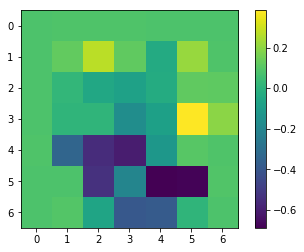

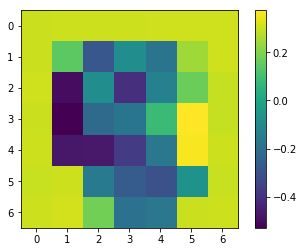

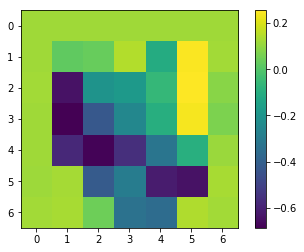

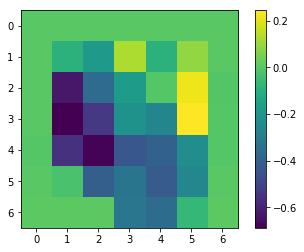

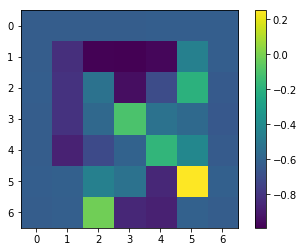

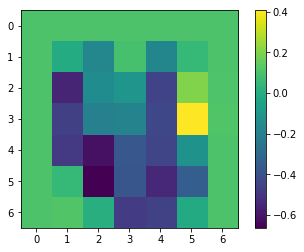

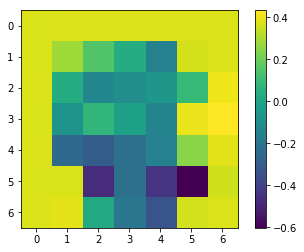

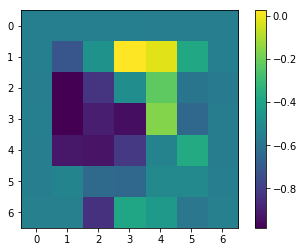

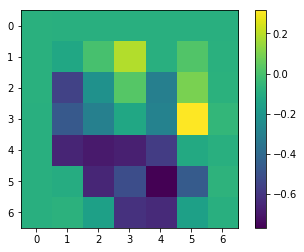

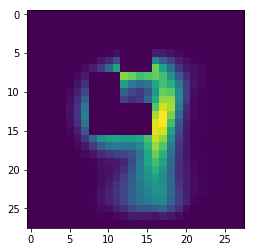

In [237]:
a = np.stack([np.stack(dictt[x][1],0) for x in dictt.keys() 
                  if (np.argmax(dictt[x][-1]) == 9 and 
                    np.sum(np.isnan(np.stack(dictt[x][1],0)))==0)],0)



for digit in range(9):
    counter = 0
    img = np.zeros((7,7))
    for i in range(7):
        for j in range(7):
            img[i,j] = np.corrcoef(a[:,9,counter],a[:,digit,counter])[0,1]
            counter += 1
    cax = plt.imshow(img)
    cb = plt.colorbar(cax)
    plt.set_title()
    plt.show()
plt.imshow(avg_pic)
plt.show()

In [301]:
np.sort(preds_i)[0][-1]

65

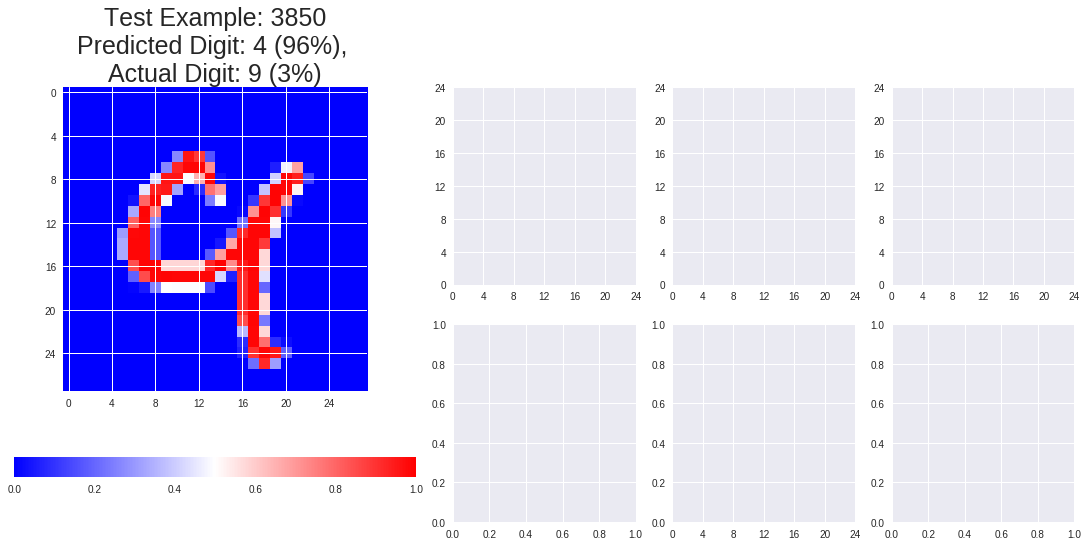

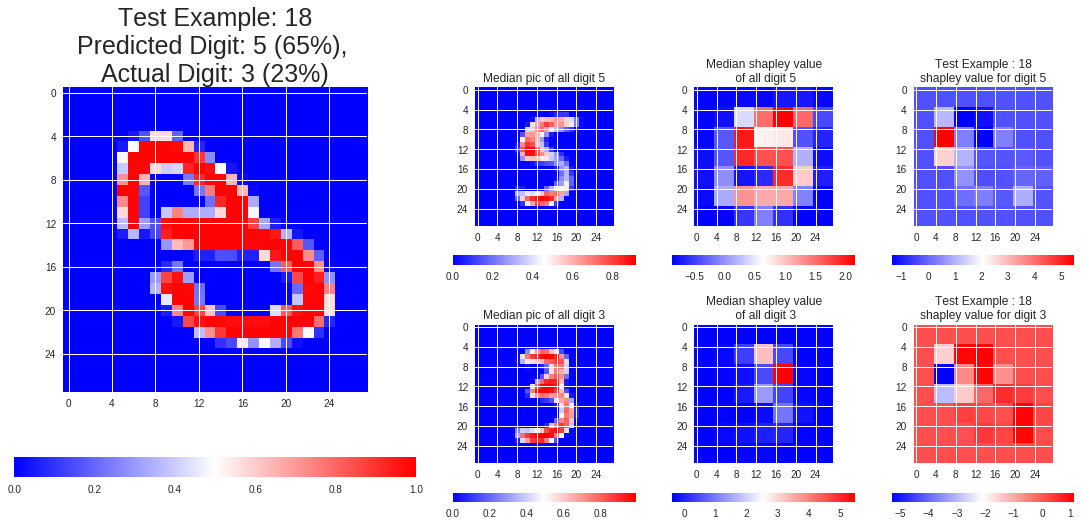

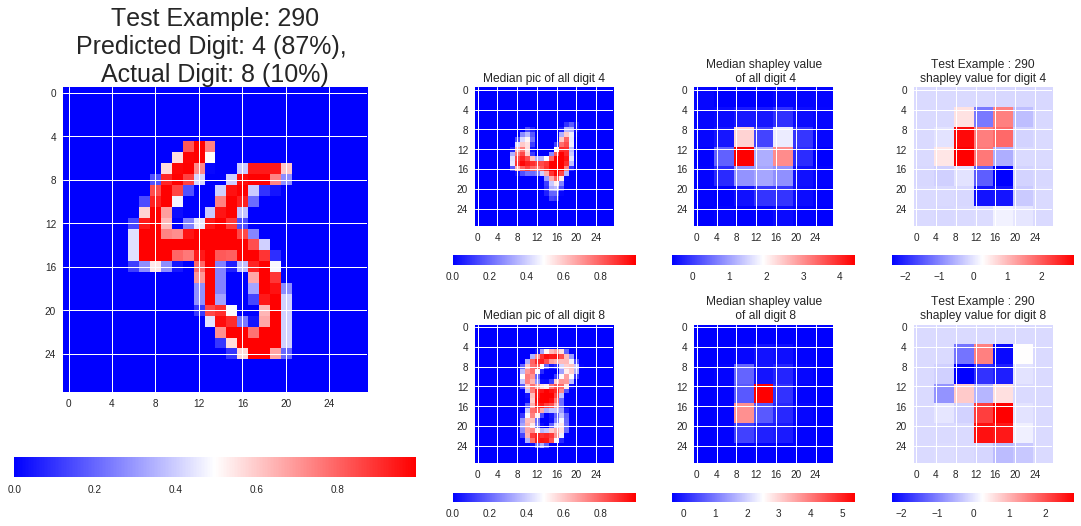

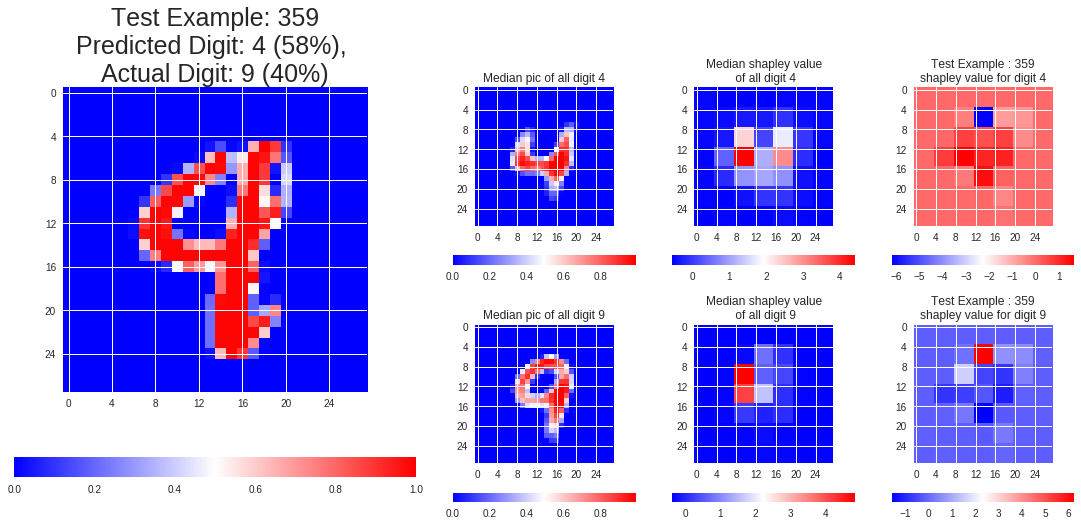

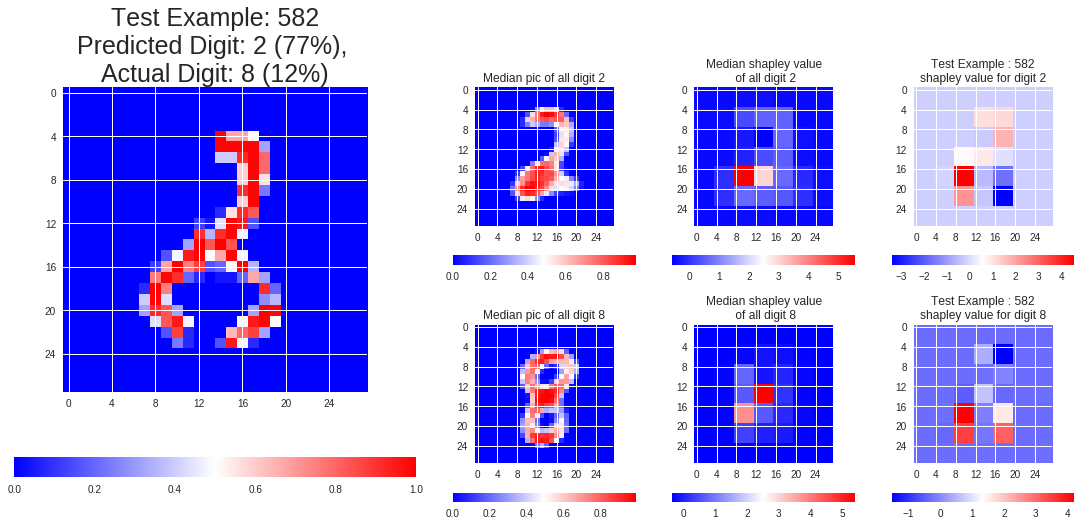

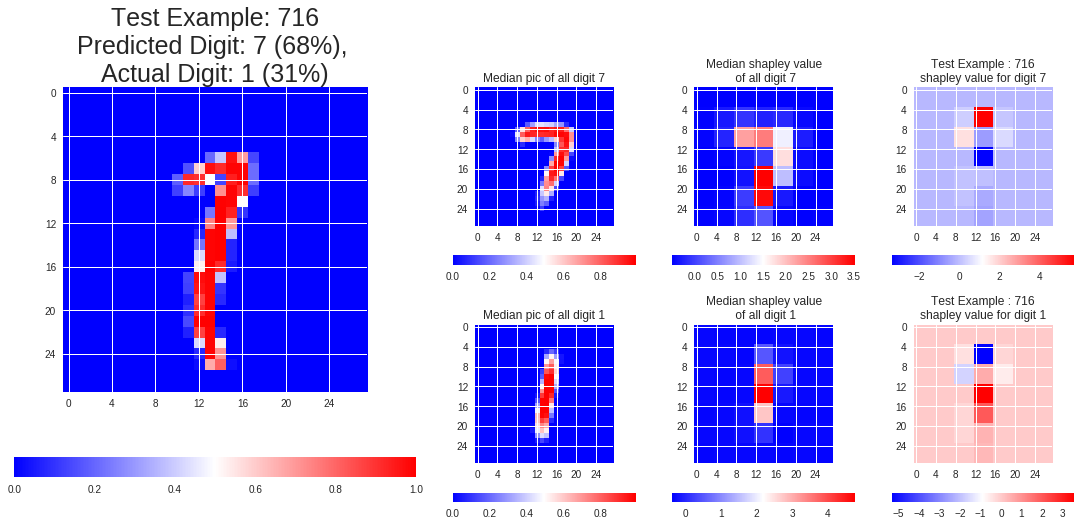

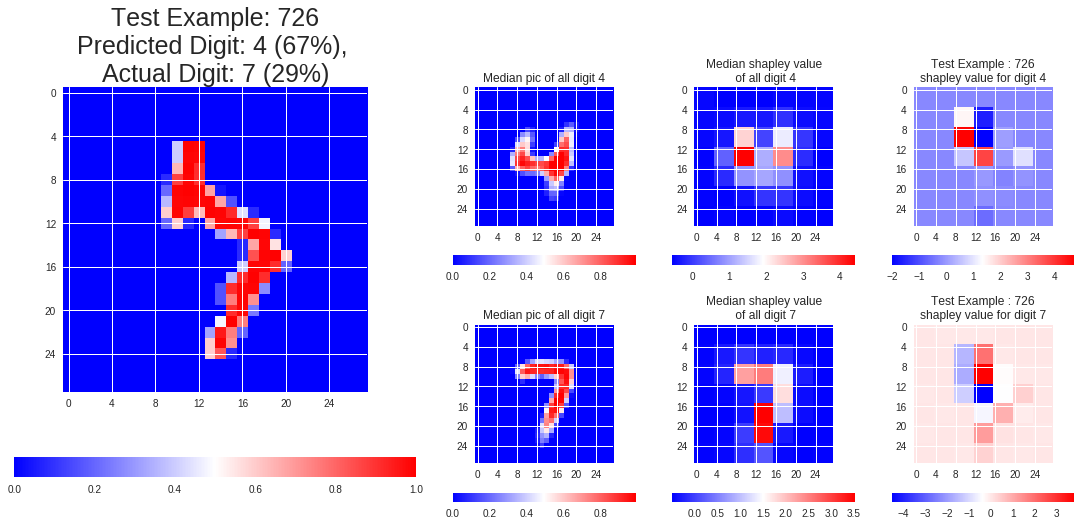

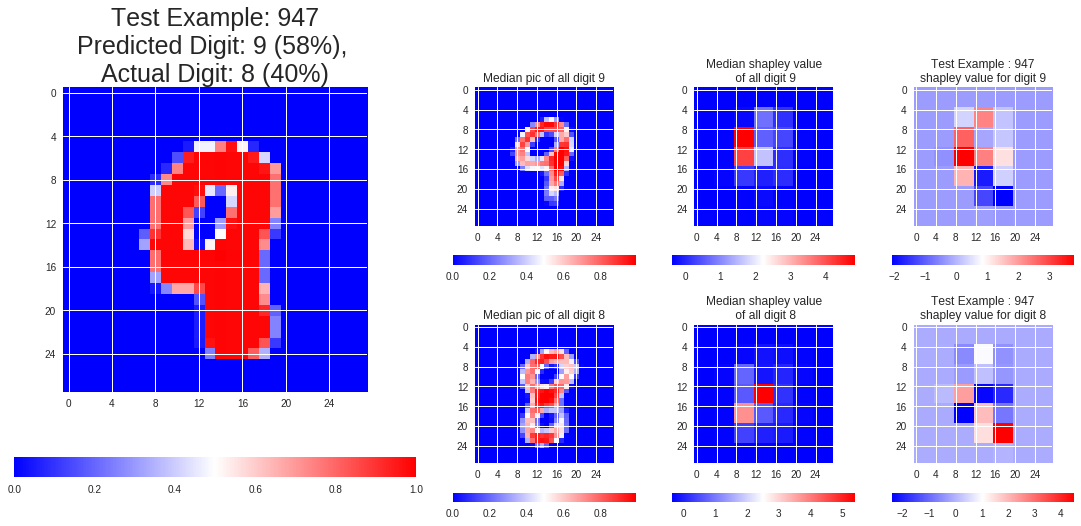

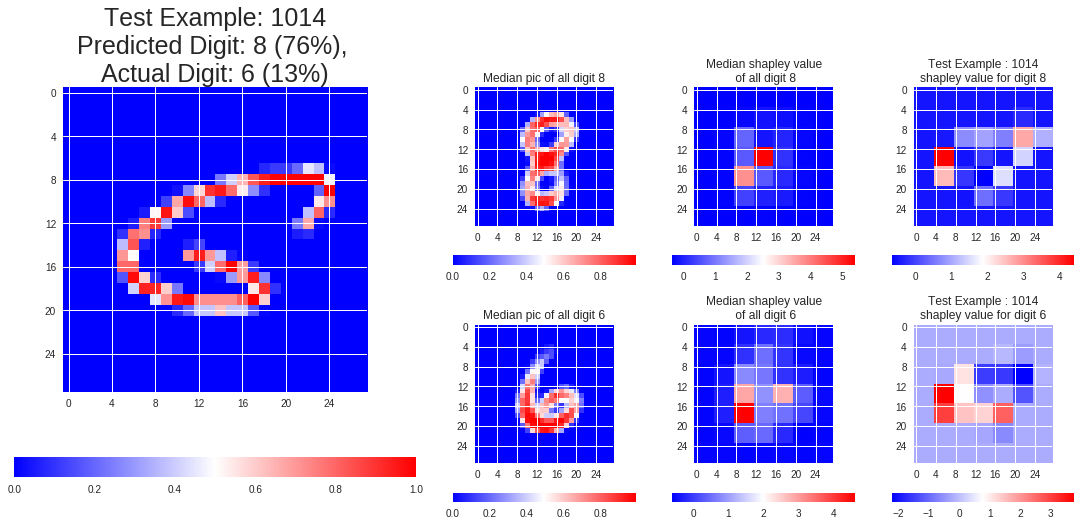

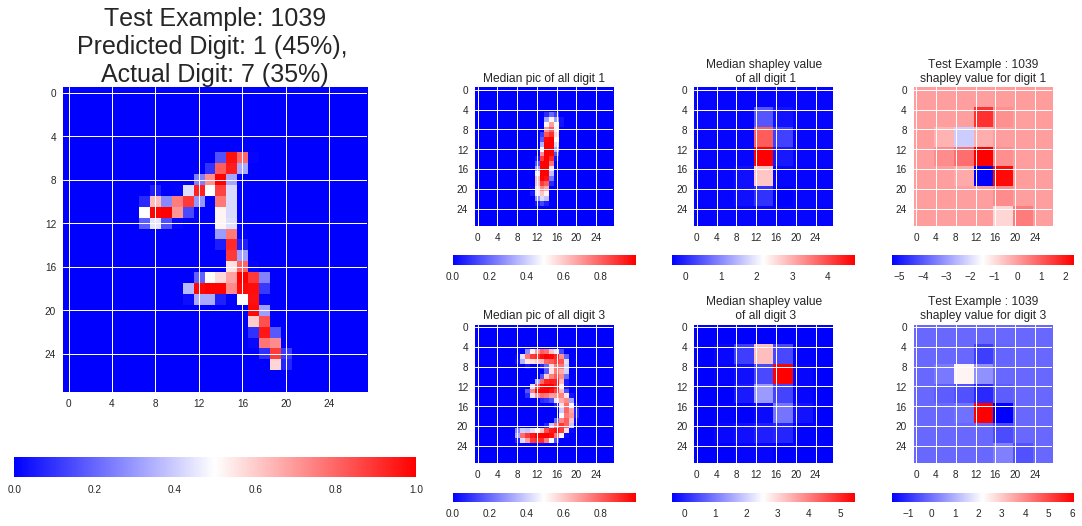

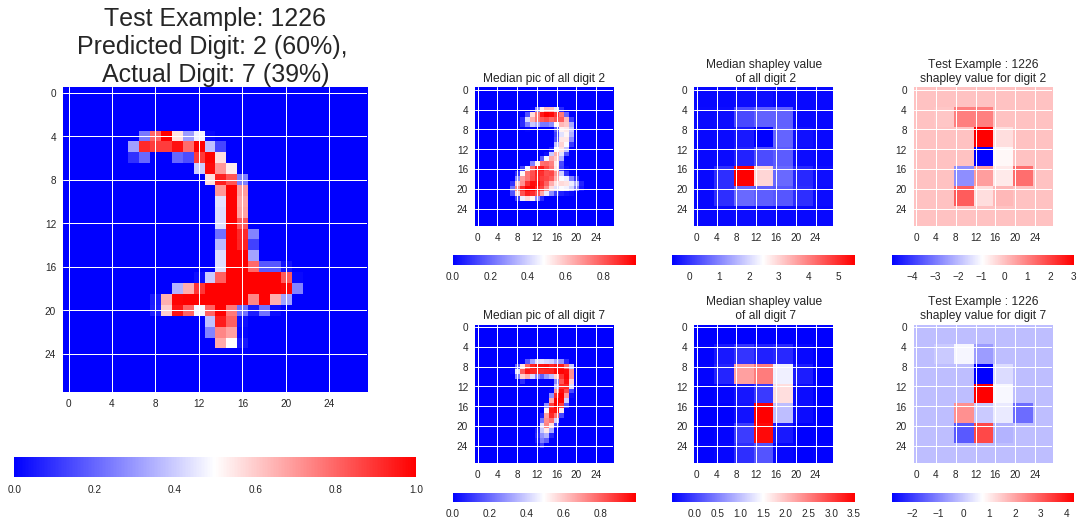

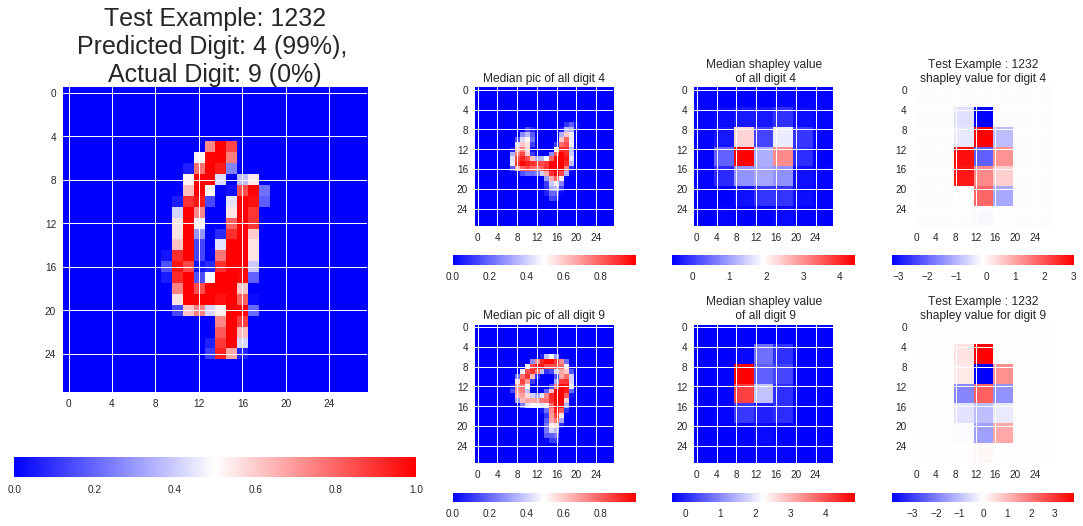

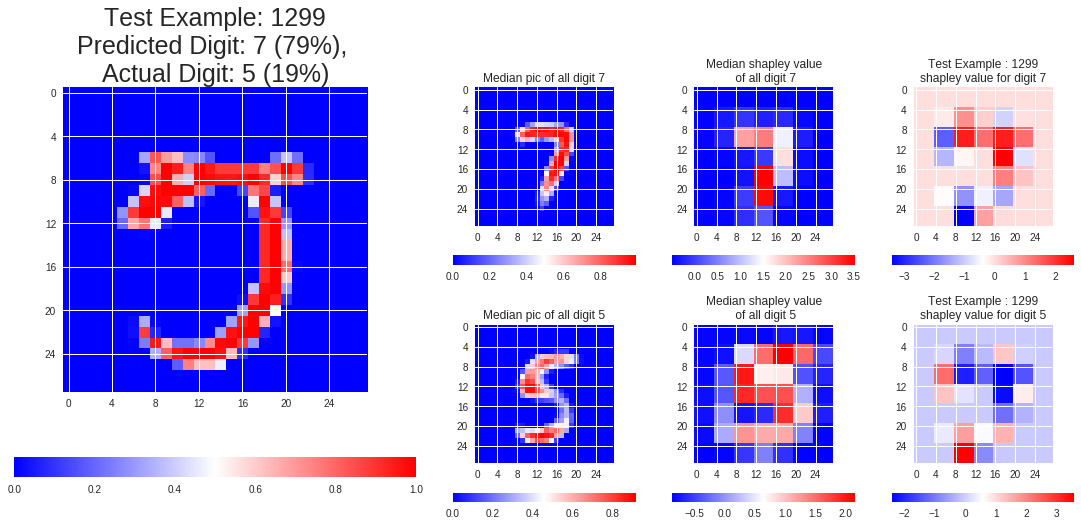

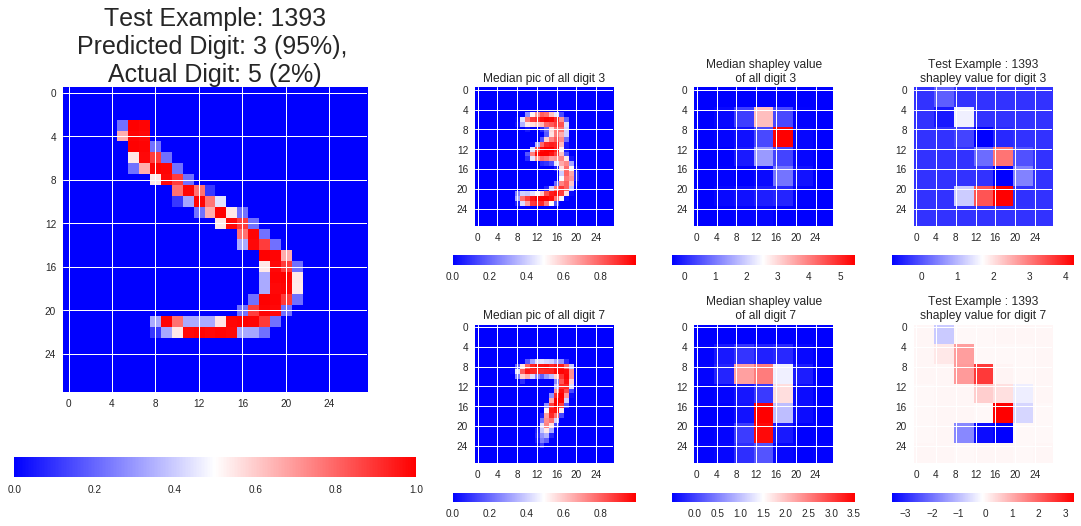

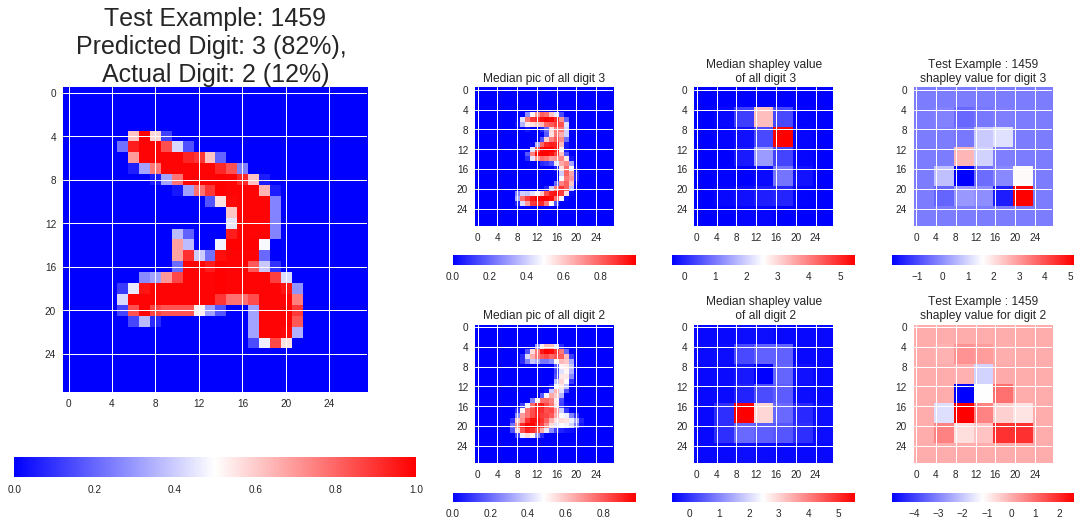

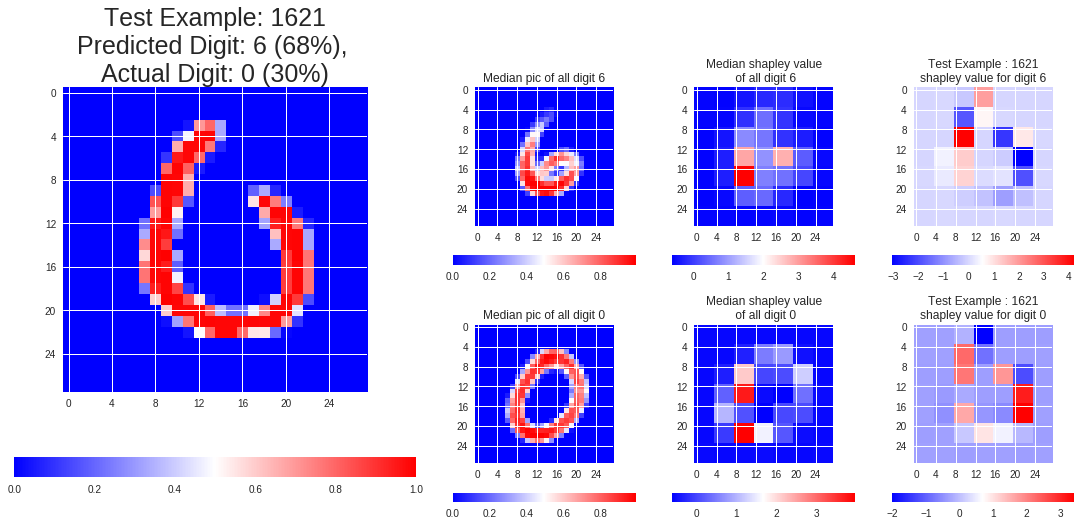

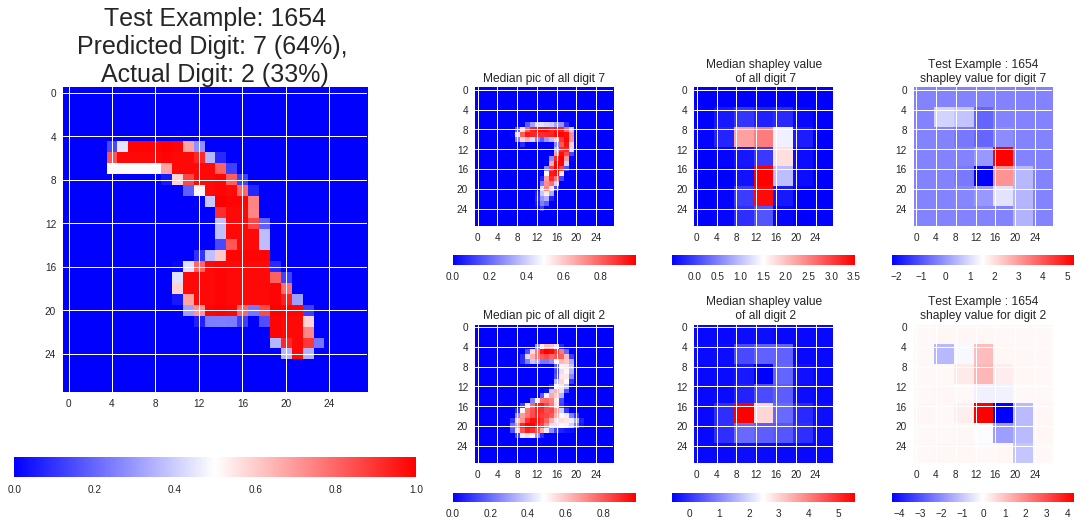

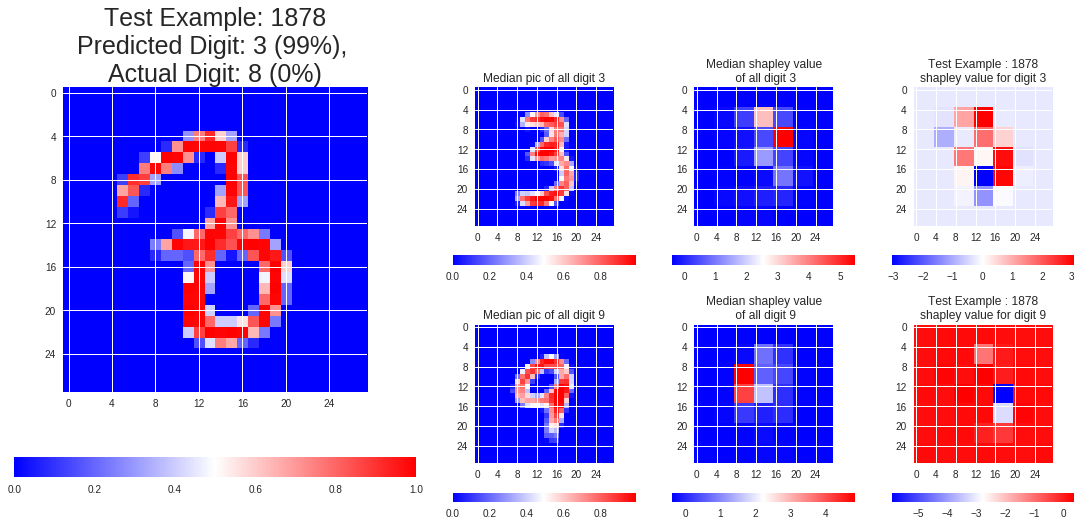

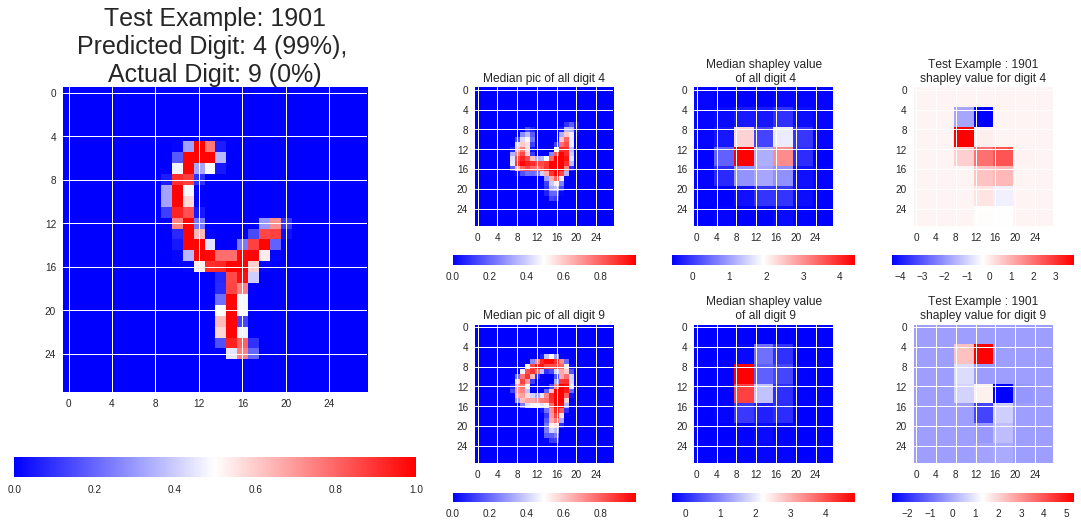

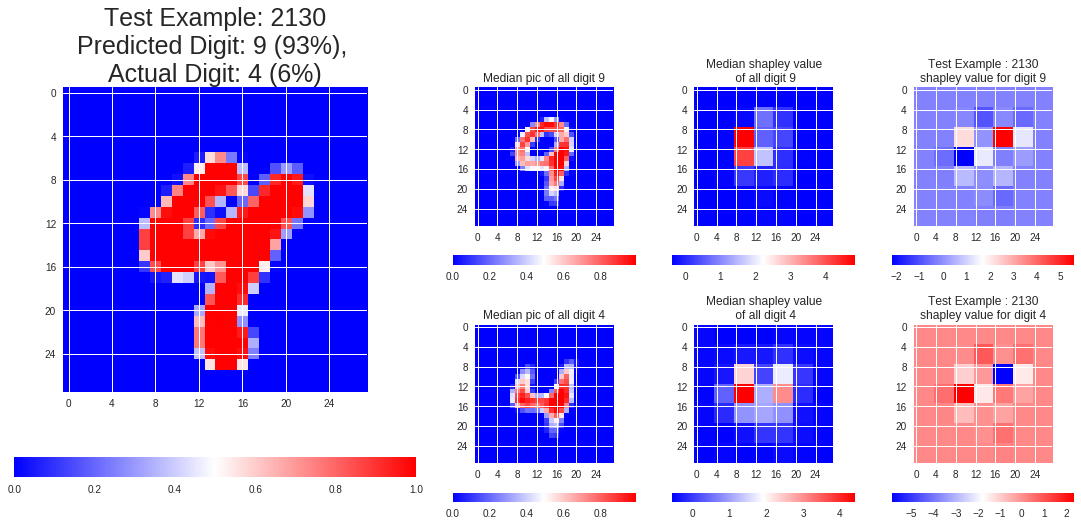

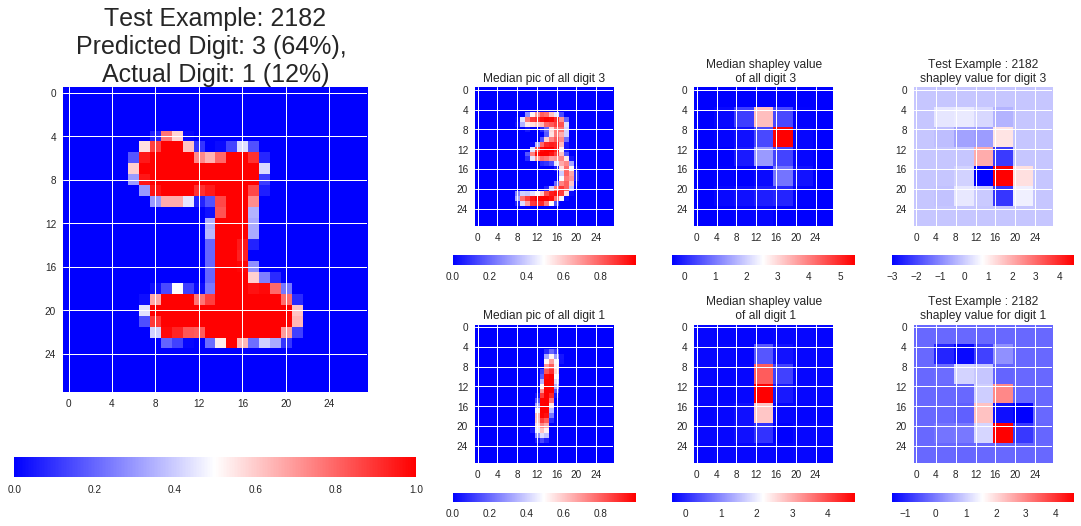

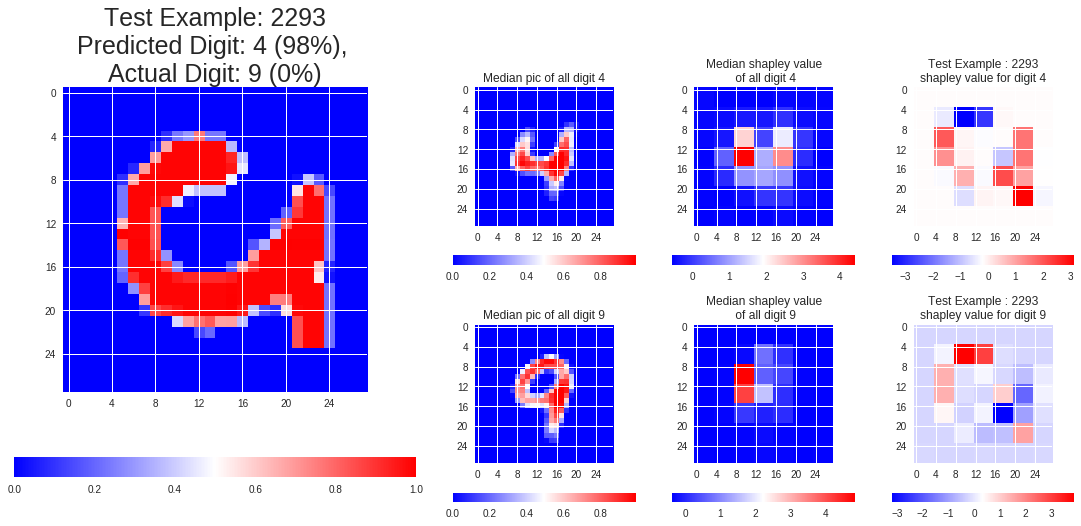

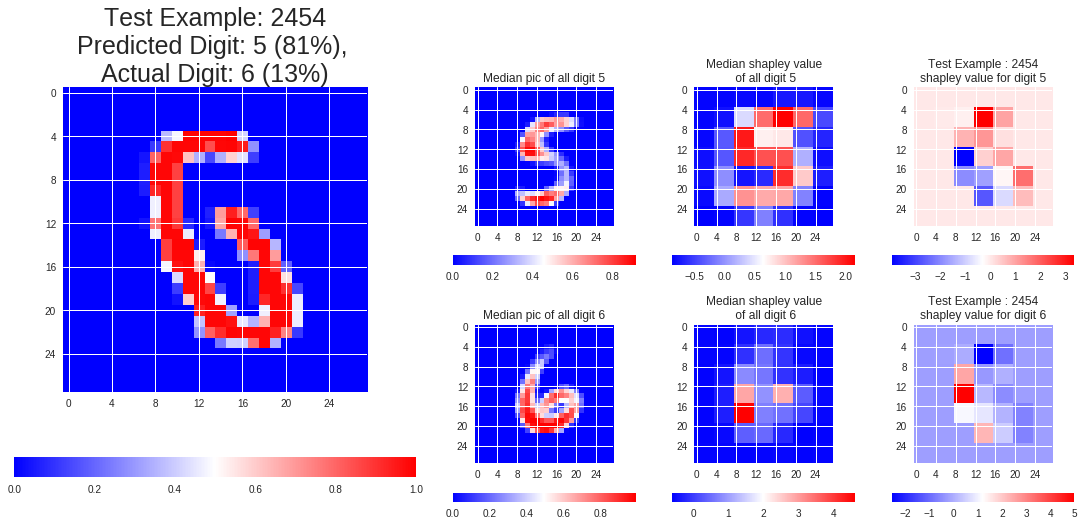

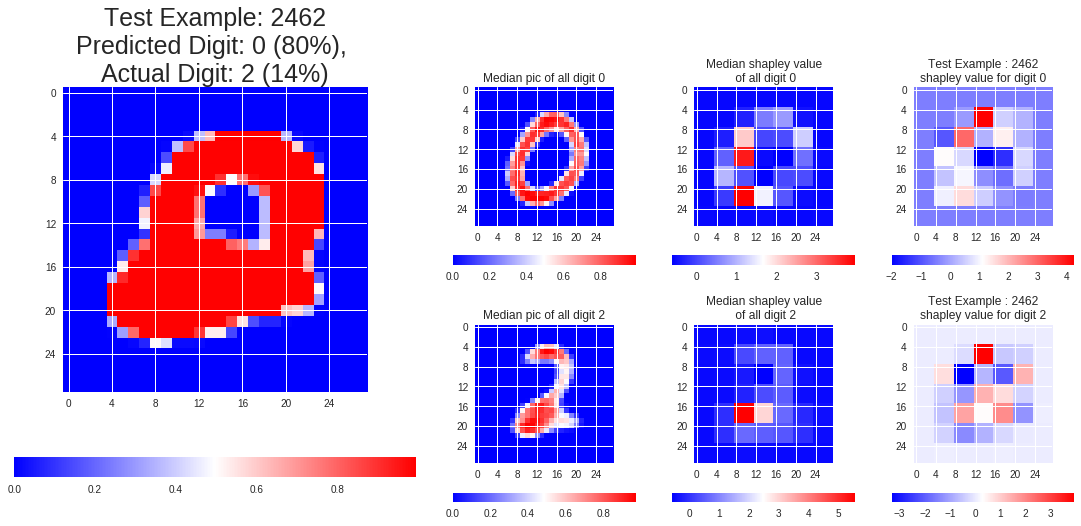

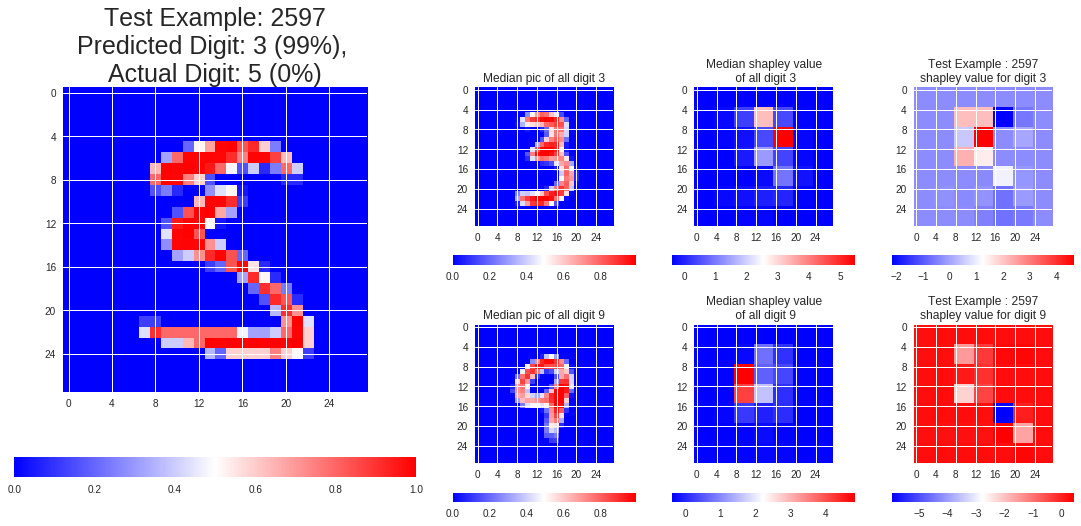

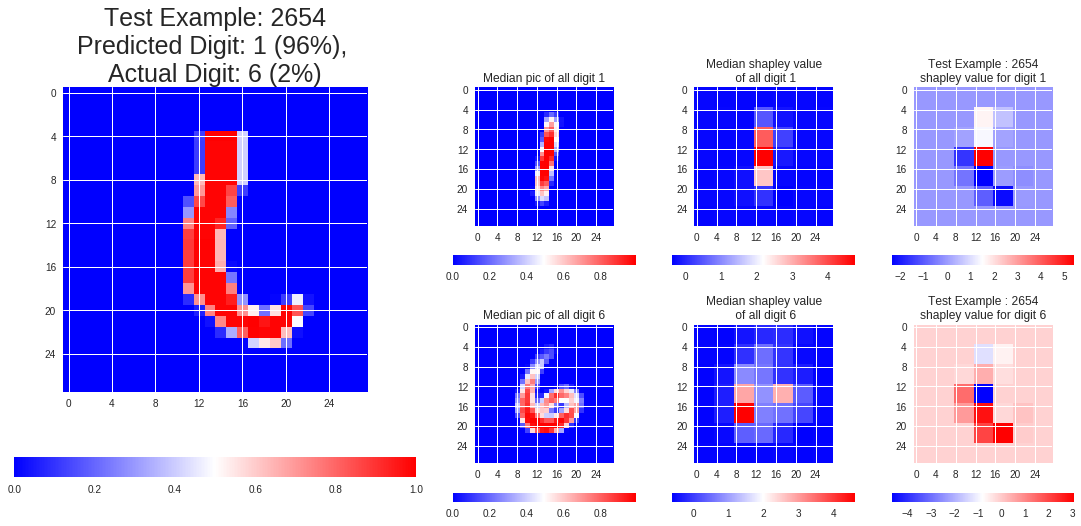

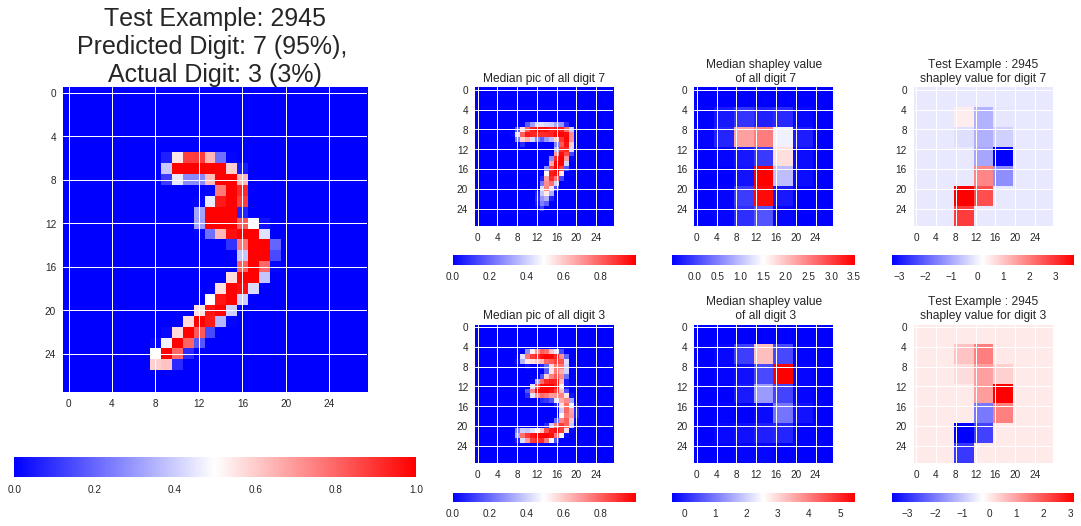

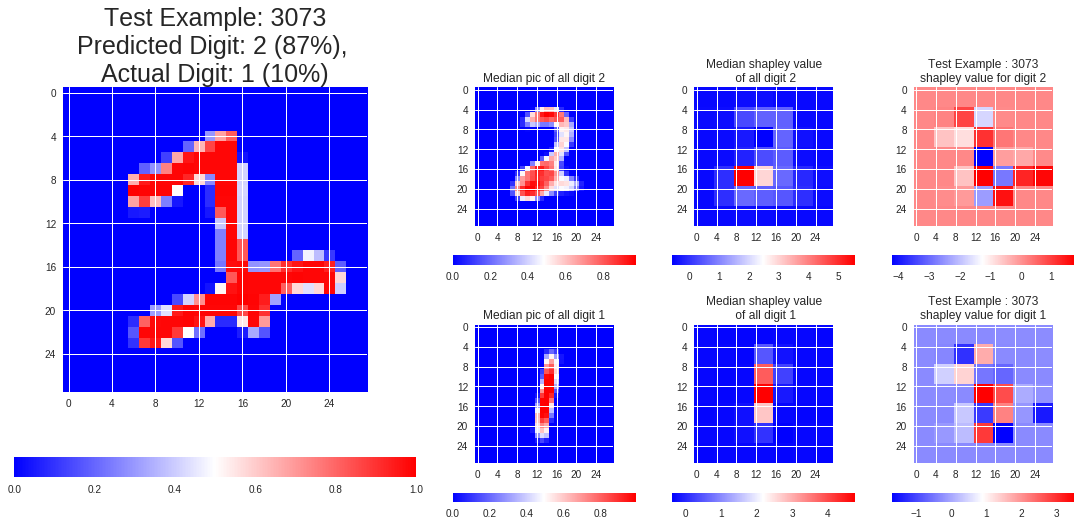

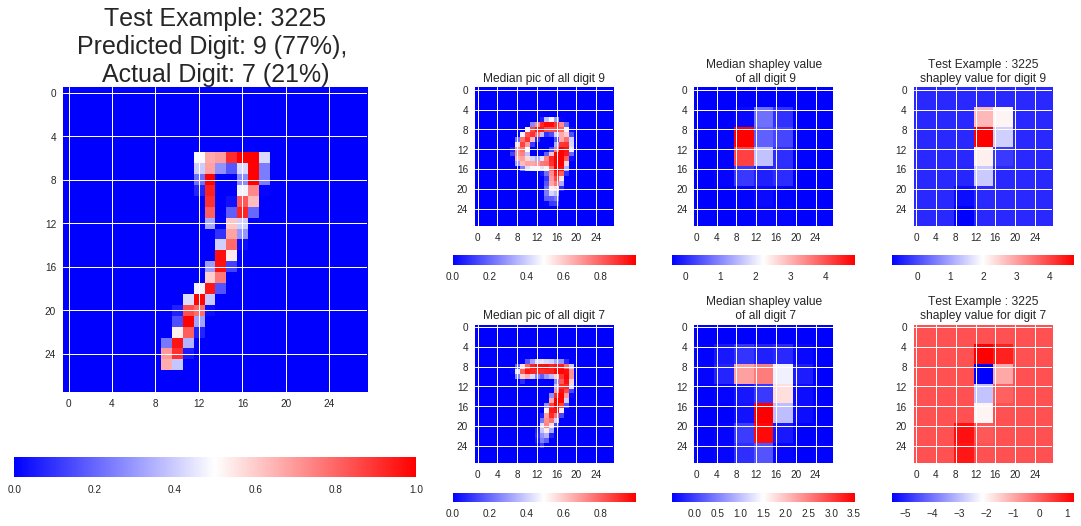

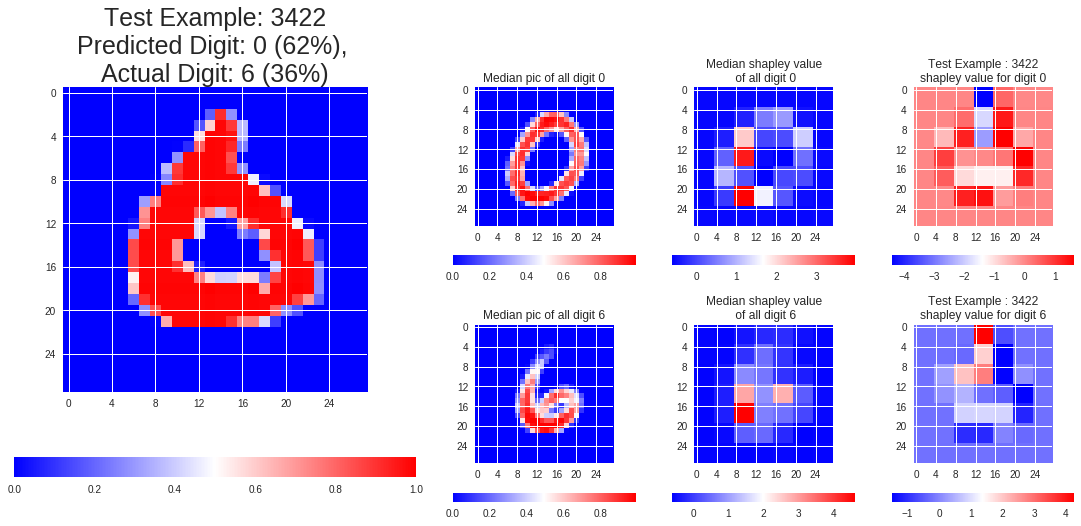

KeyboardInterrupt: 

In [321]:
from matplotlib.gridspec import GridSpec
id_wrong_predict = np.argwhere((np.argmax(pred,-1) == np.argmax(y_val,-1))==0)
for i in id_wrong_predict:
    overlaid_img = np.zeros((28,28,3))
    #f,ax = plt.subplots(3,3,figsize=(9,10))
    fig=plt.figure(figsize=(19,8))

    gs=GridSpec(2,5) # 2 rows, 3 columns

    ax1=fig.add_subplot(gs[0,4]) # First row, first column
    ax2=fig.add_subplot(gs[0,2]) # First row, second column
    ax3=fig.add_subplot(gs[0,3]) # First row, third column
    ax0=fig.add_subplot(gs[:,:2]) # Second row, span all columns
    ax4=fig.add_subplot(gs[1,4]) # First row, first column
    ax5=fig.add_subplot(gs[1,2]) # First row, second column
    ax6=fig.add_subplot(gs[1,3])
    ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6]
    ax_id = 0
    preds_i = (100*model.predict(np.array([dictt[i[0]][0]]))).astype(np.int32)
    top2 =  np.argsort(preds_i)[0][-2:][::-1]
    cax = ax[0].imshow(dictt[i[0]][0][:,:,0],cmap = plt.cm.bwr)
    overlaid_img[:,:,0] = dictt[i[0]][0][:,:,0]
    ax[ax_id].set_title('Test Example: %s\nPredicted Digit: %s (%s%%), \nActual Digit: %s (%s%%)'
                        %(i[0],np.argmax(pred,-1)[i[0]],np.sort(preds_i)[0][-1],
                          np.argmax(y_val,-1)[i[0]],np.sort(preds_i)[0][-2]),
                       fontsize=25)
    cb = plt.colorbar(cax,  ax=ax[ax_id],
                 orientation="horizontal")
    ax_id += 1
    phi = dictt[i[0]][1]
    phi = (phi - np.stack([np.mean(phi,-1),],-1))/np.stack([np.std(phi,-1),],-1)
    for ii in range(7):
            ax[ii].set_xticks(np.arange(0,28,4))
            ax[ii].set_yticks(np.arange(0,28,4))
    for digit in top2[::1]:
        min_val =np.min(phi[digit])
        max_val = np.max(phi[digit])
        shapley_image = np.copy(dictt[0][2].astype(np.float32))
        counter =0 
        for x in range(28):
            for y in range(28):
                shapley_image[x,y] = phi[digit][int(shapley_image[x,y])]
                counter += 1
        cax = ax[ax_id].imshow(shapley_image,
                                vmin=min_val, vmax=max_val,
                                cmap = plt.cm.bwr)
        cb = plt.colorbar(cax,  ax=ax[ax_id],
                         orientation="horizontal")
        ax[ax_id].set_title('Test Example : %s\nshapley value for digit %s'%(i[0],digit))
        ax_id += 1
        cax = ax[ax_id ].imshow(dictt_avg_plts[(digit,0)],cmap = plt.cm.bwr);
        cb = plt.colorbar(cax,  ax=ax[ax_id],
                         orientation="horizontal")
        ax[ax_id].set_title('Median pic of all digit %s'%digit)
        ax_id += 1
        cax = ax[ax_id].imshow(dictt_avg_plts[(digit,2+digit)],cmap = plt.cm.bwr);
        cb = plt.colorbar(cax,  ax=ax[ax_id],
                         orientation="horizontal")
        ax[ax_id].set_title('Median shapley value\n of all digit %s'%digit)
        ax_id += 1
        #cb = plt.colorbar(cax,  ax=ax[1,1+int(np.argwhere(top2 == digit)[0])],orientation="horizontal")
        overlaid_img[:,:,2] = dictt_avg_plts[(digit,0)]
    #ax[1,0].imshow(overlaid_img)
    plt.show()

In [273]:
(100*model.predict(np.array([dictt[18][0]]))).astype(np.int32)

array([[ 1,  3,  2, 23,  3, 27,  0,  2,  5, 30]], dtype=int32)

In [255]:
plt.imshow(np.stack([dictt[i[0]][0][:,:,0],]*2+[-1*shapley_image,],-1))
plt.show()

ValueError: Floating point image RGB values must be in the 0..1 range.

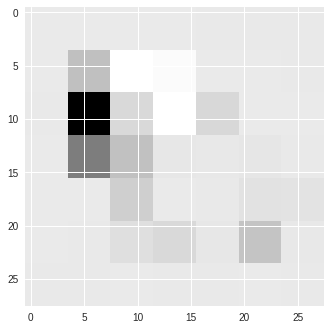

In [260]:
plt.imshow((shapley_image-np.min(shapley_image))/(np.max(shapley_image)-np.min(shapley_image)))
plt.show()

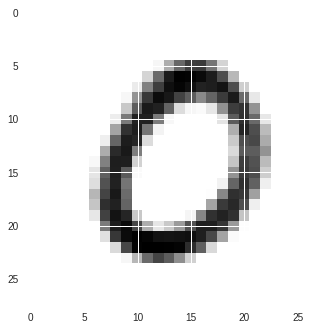

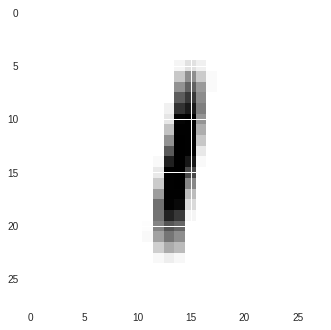

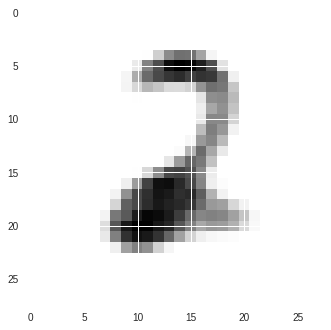

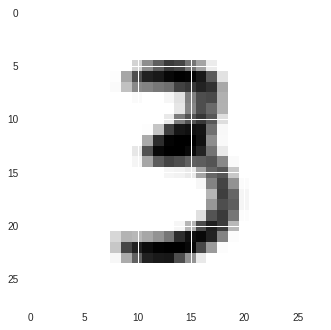

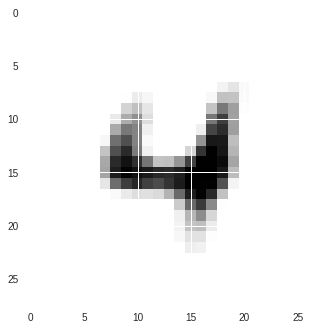

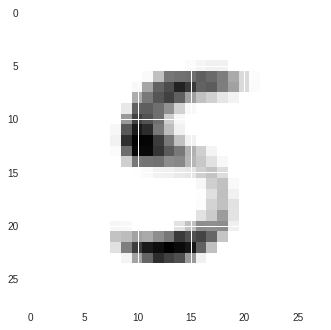

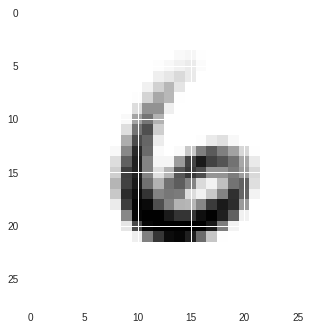

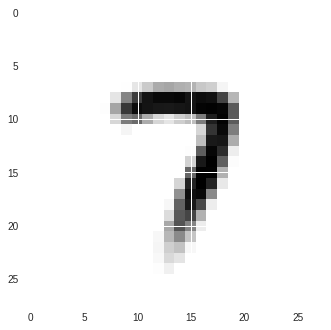

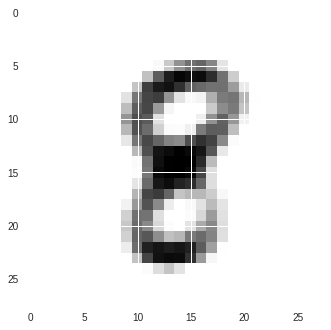

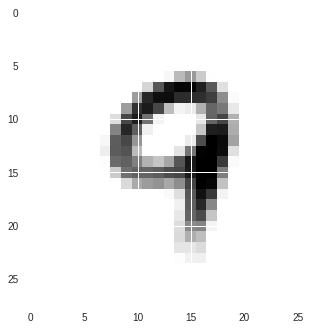

In [259]:
for i in range(10):
    plt.imshow(dictt_avg_plts[(i,0)])
    plt.show()

In [186]:
i[1]

[]